In [11]:
def saveTemp(dic,Xdata,ydata):
    for i,j in zip(Xdata,ydata):
        if i not in dic.keys():
            dic[i] = j
    return

def retrieveTemp(dic,lb,ub,Xdata,ydata):
    for key in dic.keys():
        if key>lb and key<ub and key not in Xdata:
            Xdata.append(key)
            ydata.append(dic[key])
    return

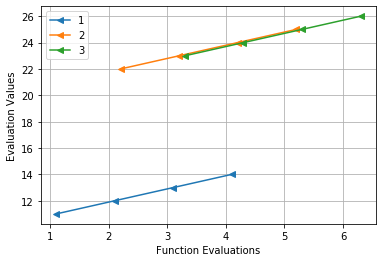

In [11]:
import matplotlib.pyplot as plt
X = [[1.1,2.1,3.1,4.1],[2.2,3.2,4.2,5.2],[3.3,4.3,5.3,6.3]]
y = [[11,12,13,14],[22,23,24,25],[23,24,25,26]]
for x,y in zip(X,y):
    plt.plot(x,y,marker='<')
plt.xlabel("Function Evaluations")
plt.ylabel("Evaluation Values")
plt.grid()
plt.legend(['1','2','3'])
plt.show()

In [9]:
import numpy as np
import sobol_seq
Xdata = sobol_seq.i4_sobol_generate(1,16)
Xdata = [lst[0] for lst in Xdata]
print(Xdata)
ratio = (5001-4999)/1.0
seq = []
for i in Xdata:
    seq.append(i*ratio+4999)
print(seq)

[0.5, 0.75, 0.25, 0.375, 0.875, 0.625, 0.125, 0.1875, 0.6875, 0.9375, 0.4375, 0.3125, 0.8125, 0.5625, 0.0625, 0.09375]
[5000.0, 5000.5, 4999.5, 4999.75, 5000.75, 5000.25, 4999.25, 4999.375, 5000.375, 5000.875, 4999.875, 4999.625, 5000.625, 5000.125, 4999.125, 4999.1875]


In [17]:
import numpy as np
from collections import Counter
import os
lst = [1,2,3,4,5]
test = lst[:]
test[1] = 100
lst

os.system('.\\all\\'+'aircrftb')

32512

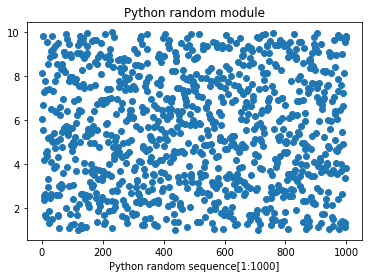

In [37]:
import random
ydata = []
for i in range(1000):
    ydata.append(random.uniform(1,10))
Xdata = [i+1 for i in range(1000)]
plt.plot(Xdata,ydata,'o')
plt.title('Python random module')
plt.xlabel('Python random sequence[1:1000]')
plt.savefig('random_generation.eps')
plt.show()

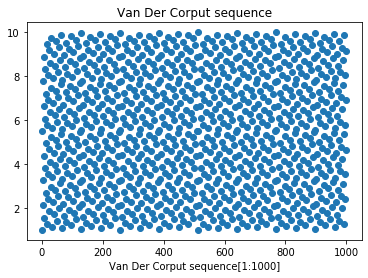

In [2]:
from Sampling import van_der_corput,halton_sequence,hammersley_sequence,latin_random_sequence,sobol_sequence
import numpy as np
import matplotlib.pyplot as plt
ydata, _ = van_der_corput(1,10,1000,2)

Xdata = [i+1 for i in range(1000)]
plt.plot(Xdata,ydata,'o')
plt.title('Van Der Corput sequence')
plt.xlabel('Van Der Corput sequence[1:1000]')
plt.savefig('vander_seq.eps')
plt.show()

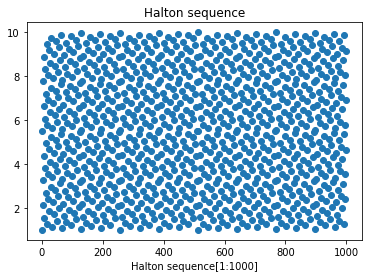

In [39]:
ydata, _ = halton_sequence(1,10,1000)

Xdata = [i+1 for i in range(1000)]
plt.plot(Xdata,ydata,'o')
plt.title('Halton sequence')
plt.xlabel('Halton sequence[1:1000]')
plt.savefig('halton_seq.eps')
plt.show()

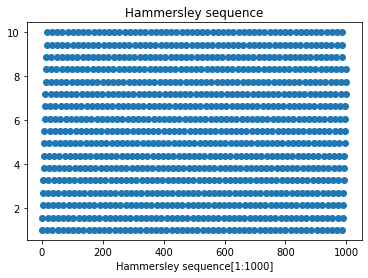

In [40]:
ydata, _ = hammersley_sequence(1,10,999)

Xdata = [i+1 for i in range(1000)]
plt.plot(Xdata,ydata,'o')
plt.title('Hammersley sequence')
plt.xlabel('Hammersley sequence[1:1000]')
plt.savefig('hammersley_seq.eps')
plt.show()

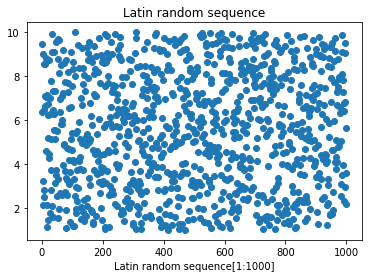

In [41]:
ydata, _ = latin_random_sequence(1,10,1000,1,1)

Xdata = [i+1 for i in range(1000)]
plt.plot(Xdata,ydata,'o')
plt.title('Latin random sequence')
plt.xlabel('Latin random sequence[1:1000]')
plt.savefig('latin_seq.eps')
plt.show()

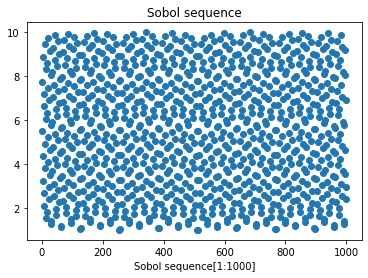

In [4]:
ydata = sobol_sequence(1,10,1,1000)
Xdata = [i+1 for i in range(1000)]
plt.plot(Xdata,ydata,'o')
plt.title('Sobol sequence')
plt.xlabel('Sobol sequence[1:1000]')
plt.savefig('sobol.eps')
plt.show()